<a href="https://colab.research.google.com/github/zecakpm/data_visualisation/blob/master/google_geocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

## Google Maps API key 

In [ ]:
API_KEY = ''

## Function to call Goodle Maps API 
* input address
* output latitude and longitude

In [ ]:
lat_list = []
long_list = []
def getGeoCoord(address):
    
    params = {
        'key': API_KEY,
        'address': address.replace(' ', '+')
    }

    base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'
    response = requests.get(base_url, params=params)
    data = response.json()
    if data['status'] == 'OK':
        result = data['results'][0]
        location = result['geometry']['location']
        lat_list.append(location['lat']), long_list.append(location['lng'])
    else:
        None

## Creating a DataFrame

In [ ]:
addresses = ['27-33 Bagoot Street Upper, Dublin, Ireland','50-55, Baggot Street Lower, Dublin, Ireland']
df = pd.DataFrame(addresses, columns=['addresses'])
df[['lat','long']] = ""
df

addresses lat long
0   27-33 Bagoot Street Upper, Dublin, Ireland         
1  50-55, Baggot Street Lower, Dublin, Ireland

## Apply function to address column

In [ ]:
df['addresses'].apply(getGeoCoord)

## Populating lat and long column on the DataFrame

In [ ]:
df['lat'] = lat_list
df['long'] = long_list
df

addresses        lat      long
0   27-33 Bagoot Street Upper, Dublin, Ireland  53.333352 -6.244349
1  50-55, Baggot Street Lower, Dublin, Ireland  53.336377 -6.247639

## Generating a map

In [ ]:
map = folium.Map(location=[53.34956009614306, -6.260818592023589], zoom_start=15)

## Adding pin(s) to the map

In [ ]:
for i in range(len(df)):
    folium.Marker(location=[df['lat'][i], df['long'][i]]).add_to(map)
#generates a responsive map (not available on code on GitHub)
map

## Static vizualization


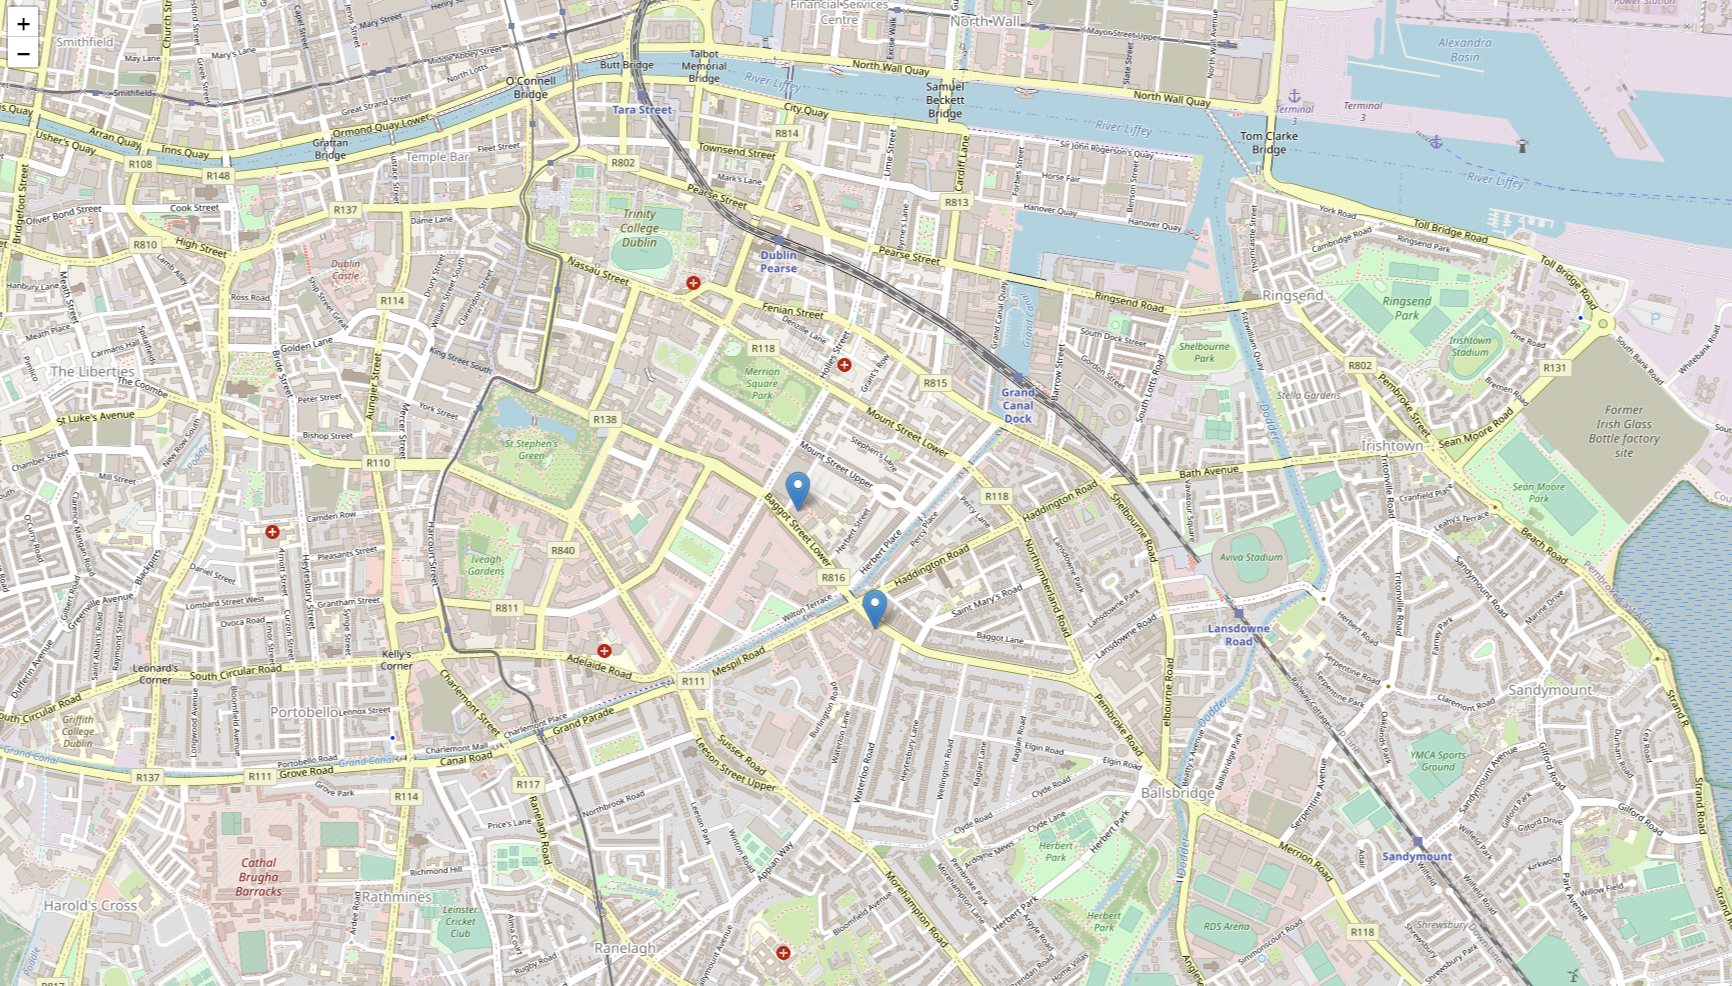